In [ ]:
import random
import math
from termcolor import colored

class Maze:
    """
    This is a class for generating and solving mazes using recursive backtracking.
      
    Attributes:
        width (int): The width of the maze.
        length (int): The length of the maze.
    """
    
    def __init__(self, width, length):
        """
        The constructor for the Maze class. Initializes nodes, which is a 2d array containing 
        boolean values. True indicates that there is a barrier in the maze and False indicates 
        that there is a free space. Also initializes visited, which is a set that will be used 
        to keep track of what nodes have been visited when solving the maze.
  
        Parameters:
            width (int): The width of the maze.
            length (int): The length of the maze. 
        """
        self.width = math.floor(width) if width % 2 == 1 else math.floor(width) + 1
        self.length = math.floor(length) if length % 2 == 1 else math.floor(length) + 1
        self.nodes = [[True for c in range(self.width)] for r in range(self.length)]
        self.visited = set()
        
    def set_path(self, c, r):
        """Function to set a node to be part of the current path by setting its value to False.

        Parameters:
            c (int): The column of the maze.
            r (int): The row of the maze. 
        """
        self.nodes[r][c] = False
        
    def is_barrier(self, c, r):
        """Function to check if a node is a barrier by checking if it is True.

        Parameters:
            c (int): The column of the maze.
            r (int): The row of the maze. 
            
        Returns:
            True if c and r are within the valid range of the maze and the node is True
            False, otherwise
        """
        if c in range(self.width) and r in range(self.length):
            return self.nodes[r][c]
        else:
            return False
        
    def create_maze(self, c, r):
        """Function to create the maze using recursive backtracking.

        Parameters:
            c (int): The column of the maze.
            r (int): The row of the maze. 
        """
        
        # sets current path 
        self.set_path(c, r)
        directions = [[1,0], [-1,0], [0,1], [0,-1]]
        # randomly shuffles the list of potential directions
        random.shuffle(directions)
        
        # iterates through list of directions
        while len(directions) > 0:
            # tests direction and finds new c and r values
            test_direction = directions.pop()
            c_pos = c + test_direction[0] * 2
            r_pos = r + test_direction[1] * 2
            
            # checks for barrier and carves a passage to the adjacent node if there is one
            # if all adjacent nodes have been visited then back up to last node with uncarved
            # wall and repeat
            if self.is_barrier(c_pos, r_pos):
                link_node_c = c + test_direction[0]
                link_node_r = r + test_direction[1]
                self.set_path(link_node_c, link_node_r)
                # recursive call from new node
                self.create_maze(c_pos, r_pos)
        return 
    
    def get_avail_neighbors(self, r, c):
        """Function which gets the available neighbor nodes that have not been visited and are 
           not barriers.

        Parameters:
            c (int): The column of the maze.
            r (int): The row of the maze. 
            
        Returns:
            neighbors (list): The list of available neighbors containing tuples of the row,
            column, and the corresponding direction.
        """
        neighbors = []
        # check right node
        if not self.nodes[r][c+1] and (r, c+1) not in self.visited:
            neighbors.append((r, c+1, colored("→ ", 'red')))
        # check left node
        if not self.nodes[r][c-1] and (r, c-1) not in self.visited:
            neighbors.append((r, c-1, colored("← ", 'red')))
        # check lower node
        if not self.nodes[r+1][c] and (r+1, c) not in self.visited:
            neighbors.append((r+1, c, colored("↓ ", 'red')))
        # check higher node
        if not self.nodes[r-1][c] and (r-1, c) not in self.visited:
            neighbors.append((r-1, c, colored("↑ ", 'red')))

        return neighbors
    
    def print_path(self, curr_path):
        """Function which prints the directions of the path onto the maze.

        Parameters:
            curr_path (list): The list of tuples containing the row, column, and direction values
            for all nodes in the current path.
        """
        for r, c, d in curr_path:
            self.nodes[r][c] = d
    
    def find_path(self, r, c, curr_path=[]):
        """Function which finds the path to solve the maze using the recursive backtracking
        algorithm. 

        Parameters:
            c (int): The column of the maze.
            r (int): The row of the maze. 
            curr_path (list): The list of tuples containing the row, column, and direction values
            for all nodes in the current path.
        """
                             
        # if maze is solved, print the directions                     
        if c == self.width - 2 and r == self.length - 2:
            self.print_path(curr_path)
            return
        
        else:
            neighbors = self.get_avail_neighbors(r, c)
            # iterate through adjacent nodes
            for nr, nc, d in neighbors:
                # add neighbor node to current path
                curr_path.append((nr, nc, d))
                # add neighbor node to set of visited nodes
                self.visited.add((nr, nc,))
                # invoke recursive backtracking algorithm             
                self.find_path(nr, nc, curr_path)
                # remove node from stack of nodes in the current path
                curr_path.pop()
                # remove node from visited set
                self.visited.remove((nr, nc))

    def __str__(self):
        """Function which overrides the print function and allows for the printing of the maze
        in a nicer fashion. Maps True values of the barriers to a black square and creates red
        arrows representing the direction of each node. Also displays and S for the start node
        and E for the end node.
            
        Returns:
            string (str): string that contains the nodes of the maze printed line by line.
        """
        string = ""
        mapping = {
            True: "■ ",
            False: "  ",
            colored("→ ", 'red'): colored("→ ", 'red'),
            colored("↓ ", 'red'): colored("↓ ", 'red'),
            colored("← ", 'red'): colored("← ", 'red'),
            colored("↑ ", 'red'): colored("↑ ", 'red'),
            "S ": "S ",
            "E ": "E "   
        }
        # sets start node to S                     
        self.nodes[1][1] = "S "
        # sets end node to E  
        self.nodes[self.width - 2][self.length - 2] = "E "
        # creates string representing maze and the solved path
        for r in range(self.length):
            for c in range(self.width):
                string += mapping[self.nodes[r][c]]
            string += "\n"
        return string


In [ ]:
maze = Maze(40,40)
maze.create_maze(1,1)
maze.find_path(1,1)
print(maze)

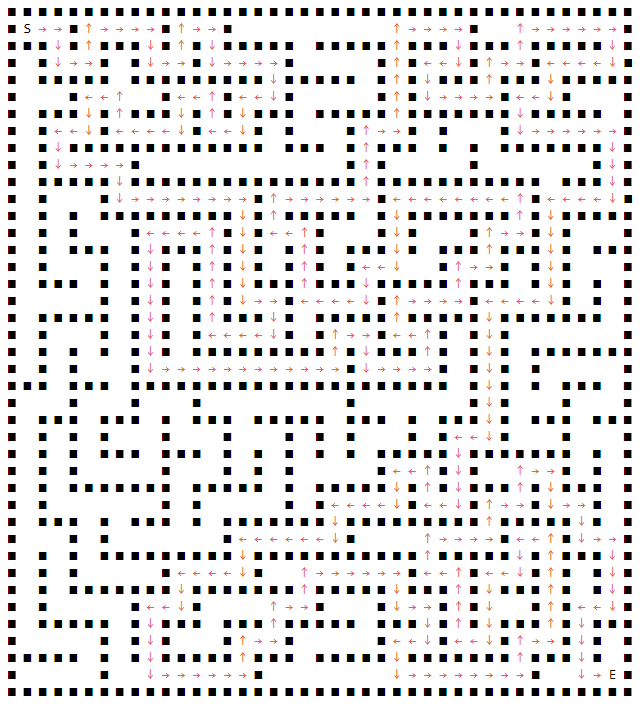